In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import *


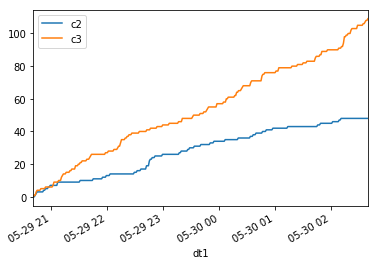

,dt1,controller,drones,queue,deliveries,fullTrips,revenue,costs,penalties,fDel,fRet,fLaunch,collisions,unknown,total
0,2018-05-30 02:39:49.556000+00:00,C_2,15,39,861,856,113294,3732.814000,0.0,0,0,48,0,0,3444
1,2018-05-30 02:39:33.221000+00:00,C_3,15,39,816,810,110269,3674.619000,169224.9,4,0,109,0,0,1923
2,2018-05-30 02:38:49.578000+00:00,C_2,15,40,861,852,113294,3725.886000,0.0,0,0,48,0,0,3436
3,2018-05-30 02:38:32.370000+00:00,C_3,15,39,812,806,109620,3667.506000,169224.9,4,0,108,0,0,1917
4,2018-05-30 02:37:49.568000+00:00,C_2,14,39,858,851,112877,3722.756000,0.0,0,0,48,0,0,3426
5,2018-05-30 02:37:32.381000+00:00,C_3,14,38,809,803,109064,3660.431000,169224.9,4,0,108,0,0,1912
6,2018-05-30 02:36:49.565000+00:00,C_2,14,40,853,846,112137,3698.174000,0.0,0,0,48,0,0,3417
7,2018-05-30 02:36:31.669000+00:00,C_3,14,40,807,800,108707,3647.029000,169224.9,4,0,107,0,0,1908
8,2018-05-30 02:35:49.566000+00:00,C_2,15,40,852,843,111953,3687.708000,0.0,0,0,48,0,0,3407
9,2018-05-30 02:35:30.737000+00:00,C_3,14,40,803,797,108353,3632.426000,169224.9,4,0,106,0,0,1901


In [58]:
inputfile = "29may_2138.txt"
yaxis = 'fLaunch'

df = pd.read_table(inputfile, " ")

df['dt1'] = df['dt1'] + " " + df['dt2'] + " " + df['dt3'] + " " + df['dt4']
df = df.drop(['dt2', 'dt3', 'dt4'], axis=1)
df['dt1'] = df['dt1'].apply(lambda x: pd.to_datetime(parse(x)))
c3 = df[df['controller'].str.contains("C_3")]
c2 = df[df['controller'].str.contains("C_2")]

ax = c2.plot(x='dt1', y=yaxis)
c3.plot(x='dt1', y=yaxis, ax=ax)
ax.legend(["c2", "c3"]);
plt.show()

df